In [106]:
#main libraries
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
from math import log2 ,sqrt
#plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.display import HTML, display
#ml packages
import tensorflow as tf
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, QuantileTransformer, MaxAbsScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from mpl_toolkits.mplot3d import Axes3D
from tensorflow import keras

warnings.filterwarnings('ignore')
#tf.logging.set_verbosity(tf.logging.ERROR)
np.random.seed(42)
random_state=42

In [107]:
url_file = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat'
columns = ['frequency',
           'angle_of_attack', 
           'chord_length', 
           'free_stream_velocity',
           'suction_side_displacement_thickness',
           'scaled_sound_pressure_level']

features = ['frequency','angle_of_attack', 
            'chord_length', 
            'free_stream_velocity',
            'suction_side_displacement_thickness']

airfoil_dataset = pd.read_csv(url_file, sep='\t', header=None, names=columns)

*frequency, in Hertzs, used as input.
*angle_of_attack, in degrees, used as input.
*chord_length, in meters, used as input.
*free_stream_velocity, in meters per second, used as input.
*suction_side_displacement_thickness, in meters, used as input.
*scaled_sound_pressure_level, in decibels, used as the target.

In [108]:
airfoil_dataset

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [109]:
airfoil_dataset.describe()

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure_level
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [110]:
airfoil_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   frequency                            1503 non-null   int64  
 1   angle_of_attack                      1503 non-null   float64
 2   chord_length                         1503 non-null   float64
 3   free_stream_velocity                 1503 non-null   float64
 4   suction_side_displacement_thickness  1503 non-null   float64
 5   scaled_sound_pressure_level          1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [111]:
airfoil_dataset.isna().sum()

frequency                              0
angle_of_attack                        0
chord_length                           0
free_stream_velocity                   0
suction_side_displacement_thickness    0
scaled_sound_pressure_level            0
dtype: int64

array([[<Axes: title={'center': 'frequency'}>,
        <Axes: title={'center': 'angle_of_attack'}>],
       [<Axes: title={'center': 'chord_length'}>,
        <Axes: title={'center': 'free_stream_velocity'}>],
       [<Axes: title={'center': 'suction_side_displacement_thickness'}>,
        <Axes: title={'center': 'scaled_sound_pressure_level'}>]],
      dtype=object)

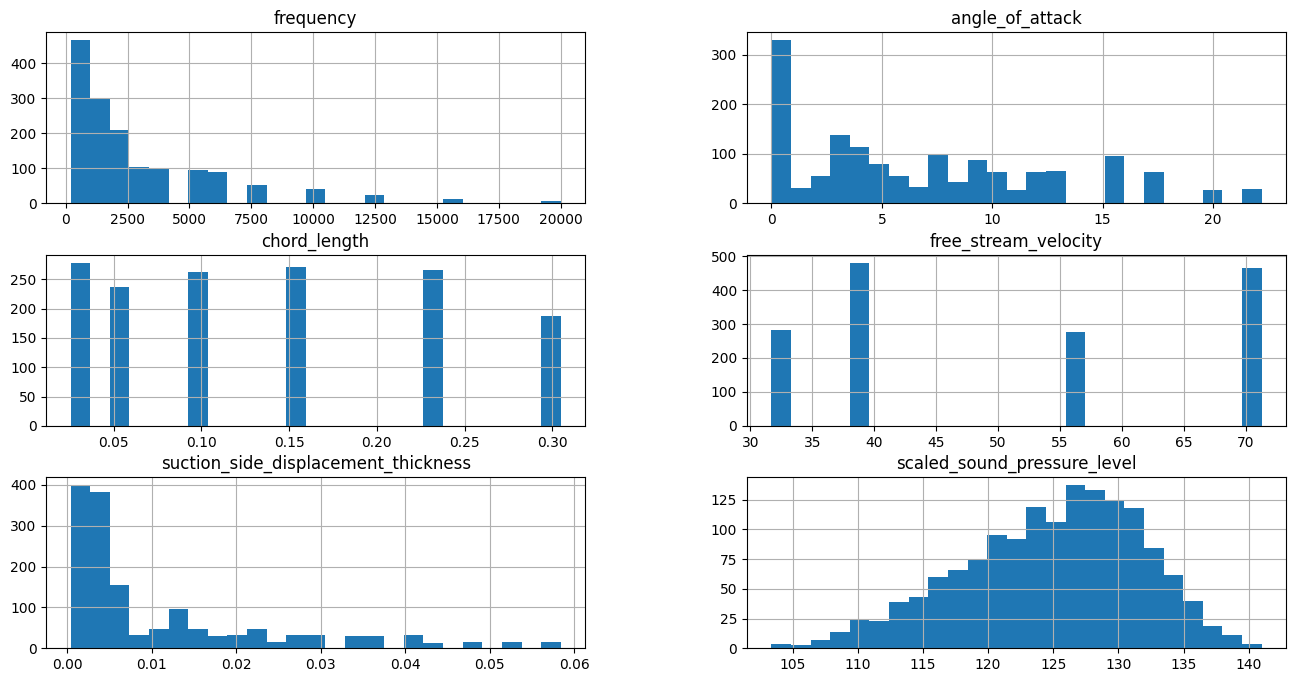

In [112]:
airfoil_dataset.hist(bins=25,figsize=(16,8))
#cont values == regression problem

<Axes: >

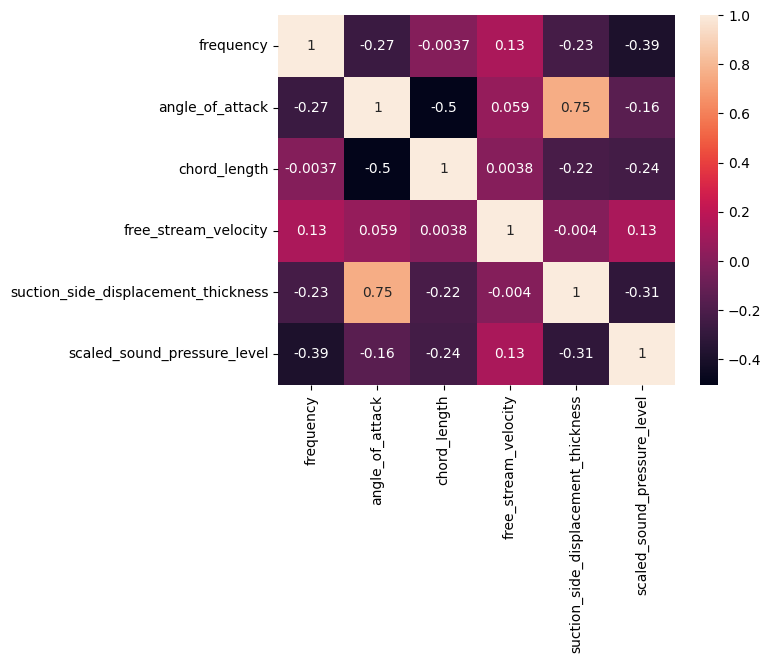

In [113]:
sns.heatmap(airfoil_dataset.corr(),annot=True)

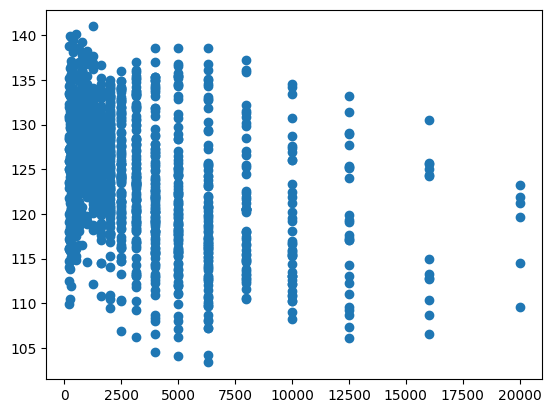

In [114]:
plt.scatter(airfoil_dataset.frequency,airfoil_dataset.scaled_sound_pressure_level)


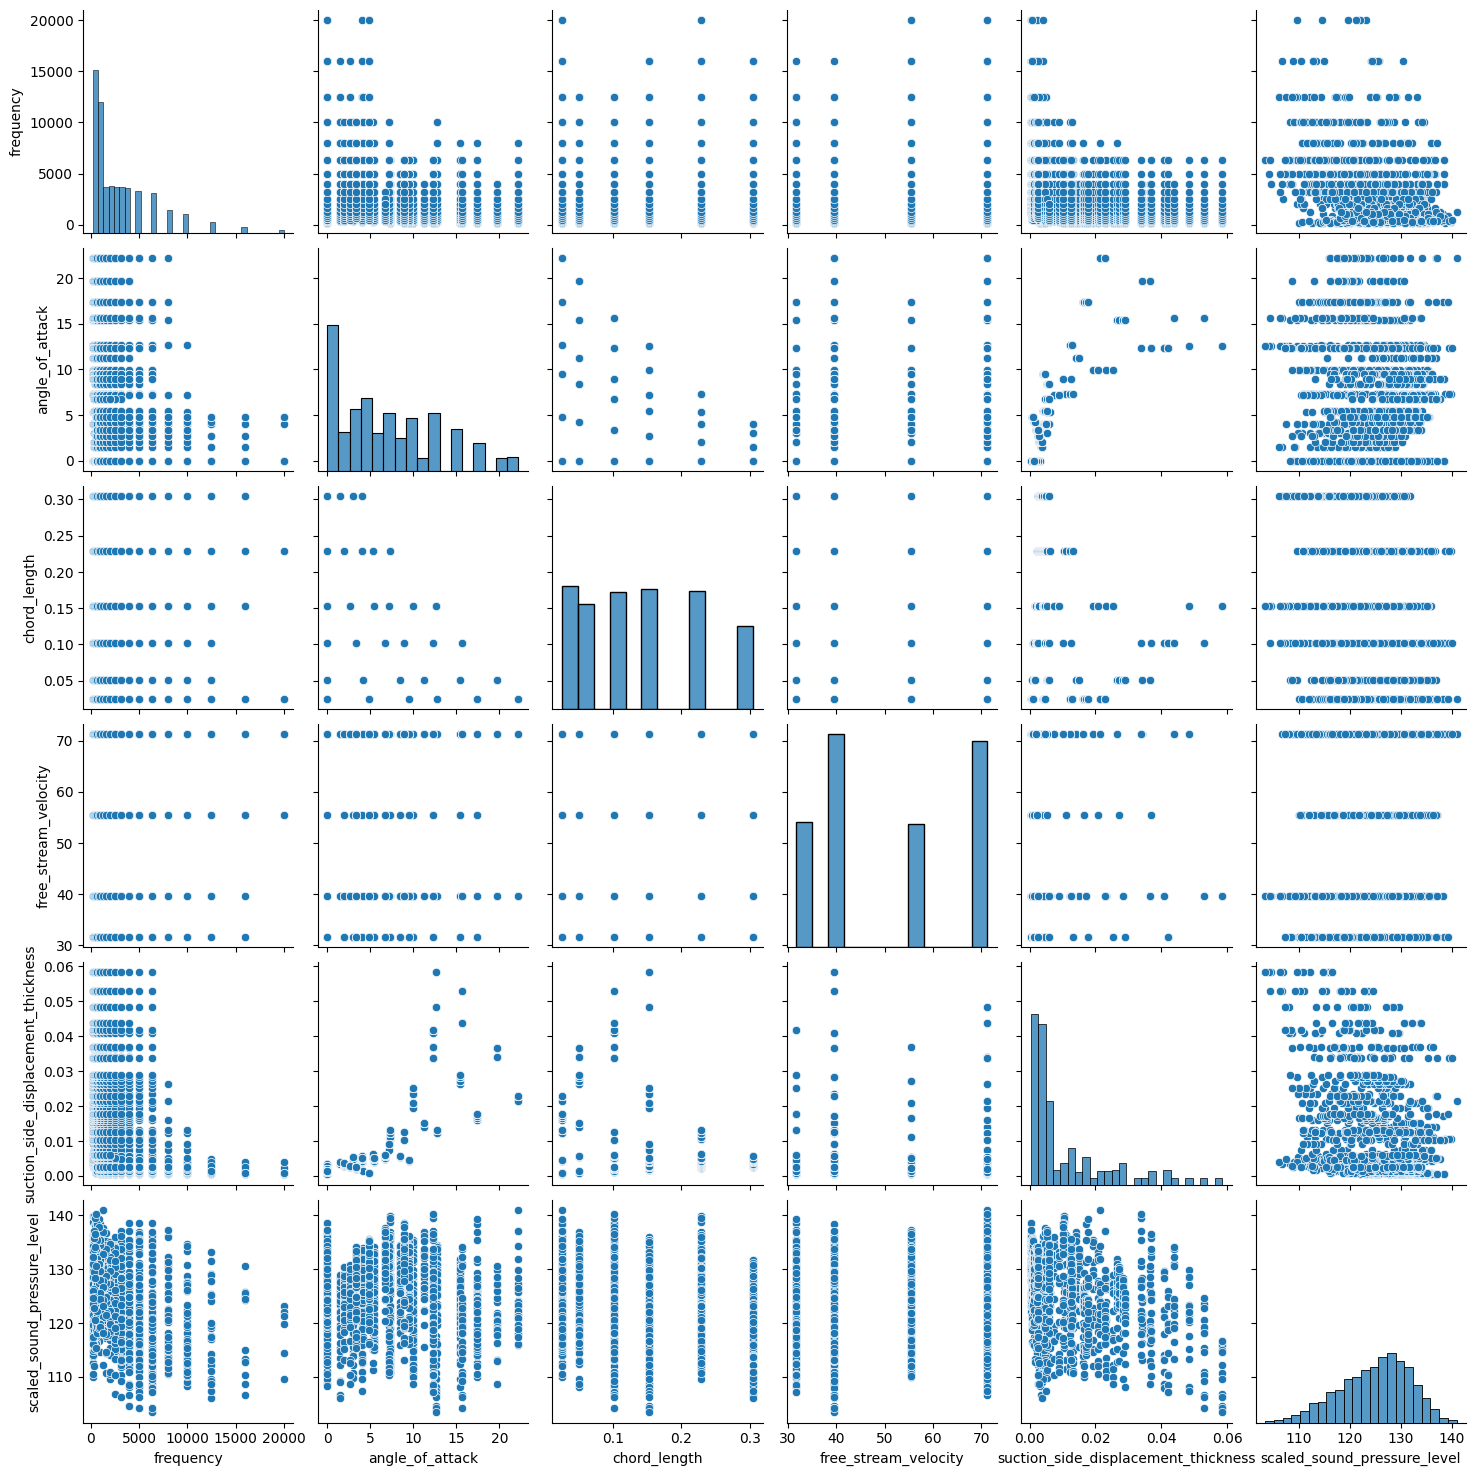

In [115]:
airfoil_plot = airfoil_dataset.copy()
sns.pairplot(airfoil_plot)

In [116]:
#preprocessing
X=airfoil_dataset.drop("scaled_sound_pressure_level",axis=1)
y=airfoil_dataset["scaled_sound_pressure_level"]

In [117]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
for i in X.columns:
    X[i]=scaler.fit_transform(X[[i]])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
#train wth different size

MODEL SELECTION

In [118]:
#lineer regression
clf=LinearRegression().fit(X_train,y_train)

In [119]:
y_pred=clf.predict(X_test)

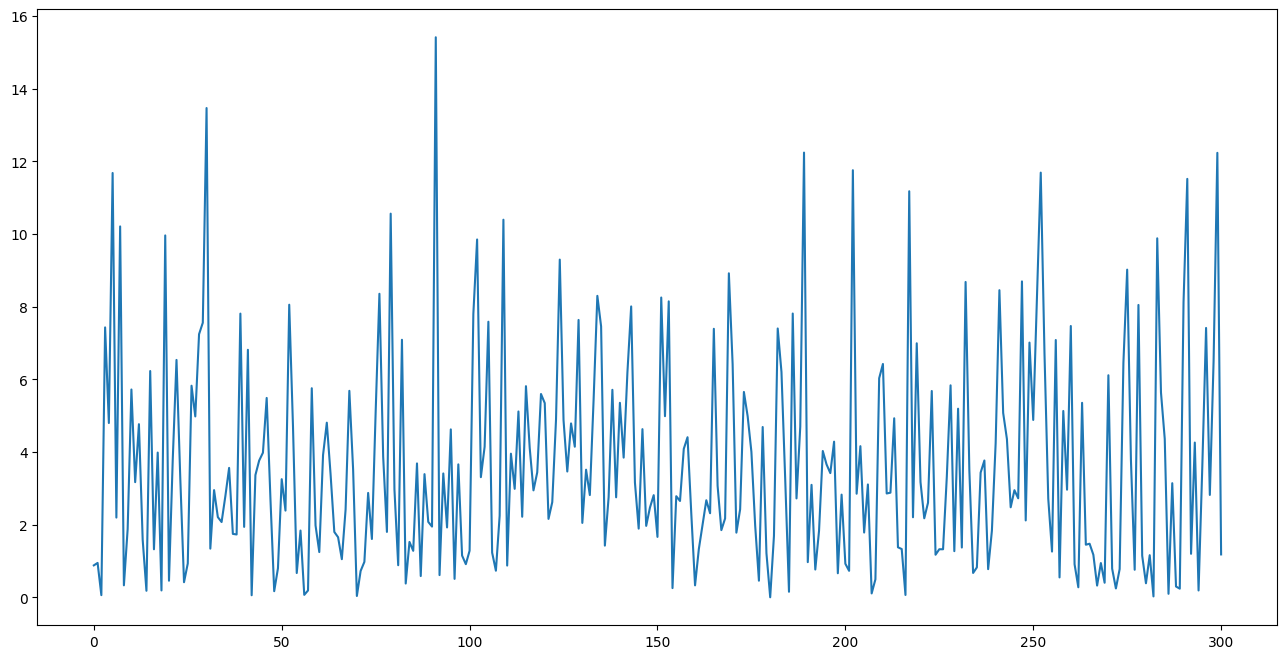

In [120]:
#Error Calculation
sample_test = np.array(y_test)
error = []
for i in range(len(y_test)):
    err = np.sqrt((sample_test[i] - y_pred[i])**2)
    error.append(err)
plt.figure(figsize=(16,8))
plt.plot(error)
plt.show()

In [121]:
#accuracy calculation
#to calculate if it overfits also check the training dataset
y_pred=clf.predict(X_train)
print("for training dataset")
print("MSE = ",mean_squared_error(y_train,y_pred))
print("MAE = ", mean_absolute_error(y_train,y_pred))
print("RMSE = ",np.sqrt(mean_squared_error(y_train,y_pred)))
y_pred=clf.predict(X_test)
print("for test dataset")
print("MSE = ",mean_squared_error(y_test,y_pred))
print("MAE = ", mean_absolute_error(y_test,y_pred))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_pred)))
r2_lr = r2_score(y_test,y_pred)

for training dataset
MSE =  23.29608012416066
MAE =  3.753726502765334
RMSE =  4.826601301553782
for test dataset
MSE =  22.128643318247274
MAE =  3.6724145641788013
RMSE =  4.704109194974887


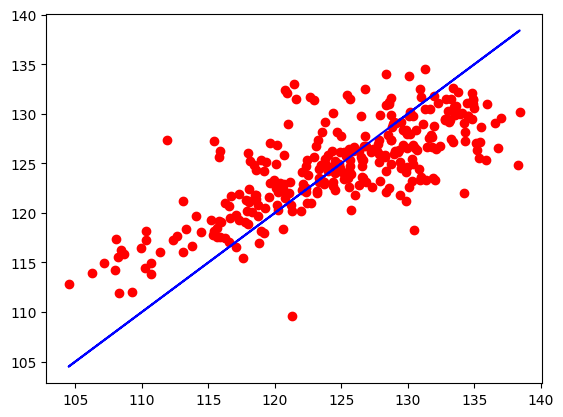

In [122]:
plt.scatter(y_test,y_pred,c="r")
plt.plot(y_test,y_test,c='blue')
plt.show()

In [123]:
#decision tree regressor
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=10).fit(X_train,y_train)
y_pred=reg.predict(X_train)
print("for training dataset")
print("MSE = ",mean_squared_error(y_train,y_pred))
print("MAE = ", mean_absolute_error(y_train,y_pred))
print("RMSE = ",np.sqrt(mean_squared_error(y_train,y_pred)))
y_pred=reg.predict(X_test)
print("for test dataset")
print("MSE = ",mean_squared_error(y_test,y_pred))
print("MAE = ", mean_absolute_error(y_test,y_pred))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_pred)))
r2_dtr = r2_score(y_test,y_pred)

for training dataset
MSE =  1.8060558134563012
MAE =  0.8072862290633528
RMSE =  1.3438957598922252
for test dataset
MSE =  6.785992249551815
MAE =  1.9230373237369862
RMSE =  2.604993713917908


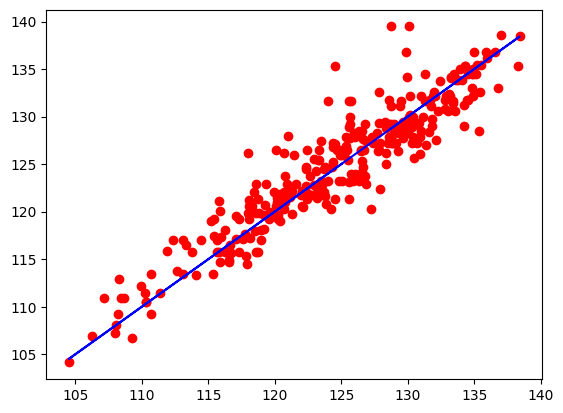

In [124]:
plt.scatter(y_test,y_pred,c="r")
plt.plot(y_test,y_test,c='blue')
plt.show()

In [125]:
#lasso regression
from sklearn.linear_model import Lasso
lasso=Lasso().fit(X_train,y_train)
y_pred=lasso.predict(X_train)
print("for training dataset")
print("MSE = ",mean_squared_error(y_train,y_pred))
print("MAE = ", mean_absolute_error(y_train,y_pred))
print("RMSE = ",np.sqrt(mean_squared_error(y_train,y_pred)))
y_pred=lasso.predict(X_test)
print("for test dataset")
print("MSE = ",mean_squared_error(y_test,y_pred))
print("MAE = ", mean_absolute_error(y_test,y_pred))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_pred)))
r2_lar = r2_score(y_test,y_pred)

for training dataset
MSE =  46.91564711820566
MAE =  5.59008019357643
RMSE =  6.849499771385182
for test dataset
MSE =  50.14052670700261
MAE =  5.791740062243989
RMSE =  7.080997578519753


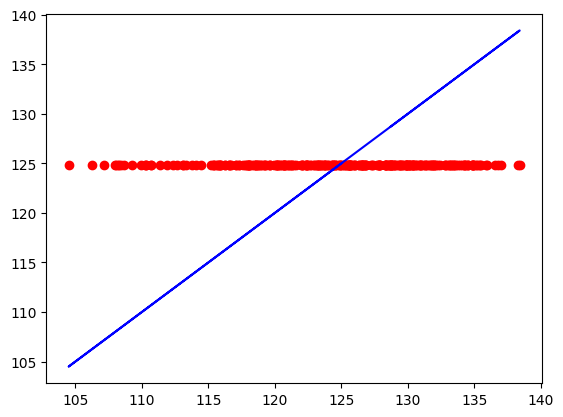

In [126]:
plt.scatter(y_test,y_pred,c="r")
plt.plot(y_test,y_test,c='blue')
plt.show()

In [127]:
from sklearn.linear_model import Ridge
ridge =Ridge().fit(X_train,y_train)
y_pred=ridge.predict(X_test)
y_pred=ridge.predict(X_train)
print("for training dataset")
print("MSE = ",mean_squared_error(y_train,y_pred))
print("MAE = ", mean_absolute_error(y_train,y_pred))
print("RMSE = ",np.sqrt(mean_squared_error(y_train,y_pred)))
y_pred=ridge.predict(X_test)
print("for test dataset")
print("MSE = ",mean_squared_error(y_test,y_pred))
print("MAE = ", mean_absolute_error(y_test,y_pred))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_pred)))
r2_rdg = r2_score(y_test,y_pred)

for training dataset
MSE =  23.321363882936367
MAE =  3.7718061705021784
RMSE =  4.829219800644444
for test dataset
MSE =  22.27888694308168
MAE =  3.703695487501286
RMSE =  4.720051582671706


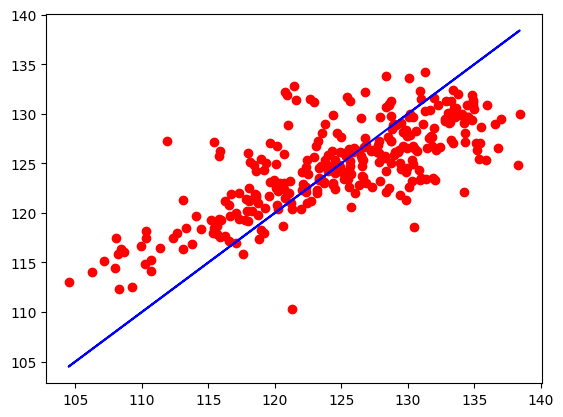

In [128]:
plt.scatter(y_test,y_pred,c="r")
plt.plot(y_test,y_test,c='blue')
plt.show()

In [129]:
from sklearn.linear_model import ElasticNet
enet=ElasticNet().fit(X_train,y_train)

y_pred=enet.predict(X_train)
print("for training dataset")
print("MSE = ",mean_squared_error(y_train,y_pred))
print("MAE = ", mean_absolute_error(y_train,y_pred))
print("RMSE = ",np.sqrt(mean_squared_error(y_train,y_pred)))
y_pred=enet.predict(X_test)
print("for test dataset")
print("MSE = ",mean_squared_error(y_test,y_pred))
print("MAE = ", mean_absolute_error(y_test,y_pred))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_pred)))
r2_enet = r2_score(y_test,y_pred)

for training dataset
MSE =  46.82096474579918
MAE =  5.585072207374832
RMSE =  6.842584653900833
for test dataset
MSE =  50.05268625226365
MAE =  5.787641231547028
RMSE =  7.074792311599235


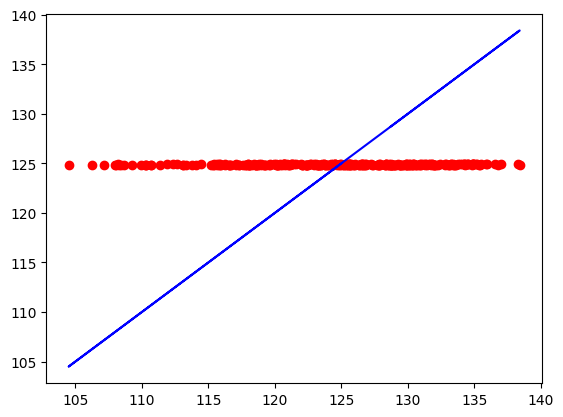

In [130]:
plt.scatter(y_test,y_pred,c="r")
plt.plot(y_test,y_test,c='blue')
plt.show()

In [131]:
svr=SVR().fit(X_train,y_train)
y_pred=svr.predict(X_test)
y_pred=svr.predict(X_train)
print("for training dataset")
print("MSE = ",mean_squared_error(y_train,y_pred))
print("MAE = ", mean_absolute_error(y_train,y_pred))
print("RMSE = ",np.sqrt(mean_squared_error(y_train,y_pred)))
y_pred=svr.predict(X_test)
print("for test dataset")
print("MSE = ",mean_squared_error(y_test,y_pred))
print("MAE = ", mean_absolute_error(y_test,y_pred))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_pred)))
r2_svr = r2_score(y_test,y_pred)

for training dataset
MSE =  17.234203217076846
MAE =  3.1070332646512786
RMSE =  4.151409786696183
for test dataset
MSE =  17.478558958118224
MAE =  3.196533489418103
RMSE =  4.1807366525671315


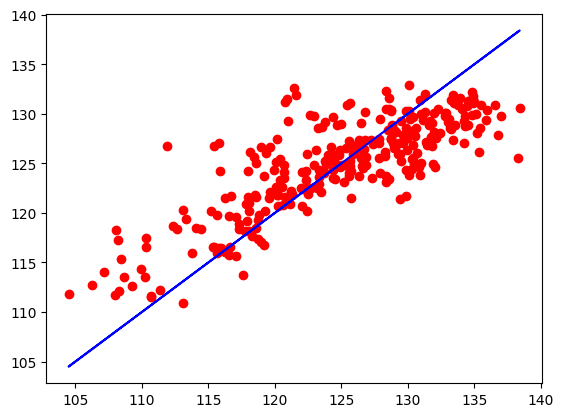

In [132]:
plt.scatter(y_test,y_pred,c="r")
plt.plot(y_test,y_test,c='blue')
plt.show()

In [133]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor().fit(X_train,y_train)
y_pred=rfr.predict(X_train)
print("for training dataset")
print("MSE = ",mean_squared_error(y_train,y_pred))
print("MAE = ", mean_absolute_error(y_train,y_pred))
print("RMSE = ",np.sqrt(mean_squared_error(y_train,y_pred)))
y_pred=rfr.predict(X_test)
print("for test dataset")
print("MSE = ",mean_squared_error(y_test,y_pred))
print("MAE = ", mean_absolute_error(y_test,y_pred))
print("RMSE = ",np.sqrt(mean_squared_error(y_test,y_pred)))
r2_rfr = r2_score(y_test,y_pred)

for training dataset
MSE =  0.4478670023694748
MAE =  0.48606168885191786
RMSE =  0.669228662244434
for test dataset
MSE =  3.377216155829893
MAE =  1.346563322259134
RMSE =  1.8377203693244228


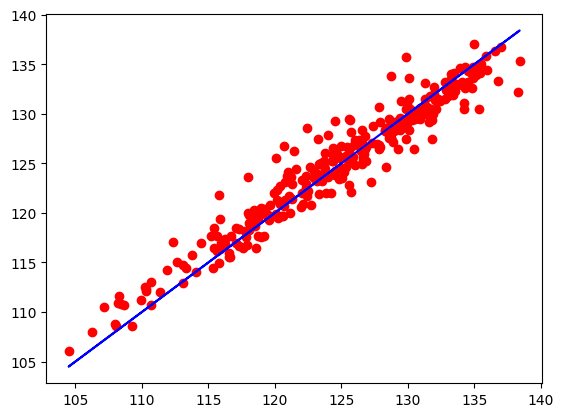

In [134]:
plt.scatter(y_test,y_pred,c="r")
plt.plot(y_test,y_test,c='blue')
plt.show()

In [135]:
results_model = {'Model' : ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'ElasticNet Regression', 'Support Vector Regression', 'Decision Tree Regression', 'Random Forest Regression'], 
                 'R2 Score' : [r2_lr, r2_lar, r2_rdg, r2_enet, r2_svr, r2_dtr, r2_rfr],
                 'Percentage(R2 Score)' : [r2_lr*100, r2_lar*100, r2_rdg*100, r2_enet*100, r2_svr*100, r2_dtr*100, r2_rfr*100,]
                }
results = pd.DataFrame(data = results_model)
results

,Model,R2 Score,Percentage(R2 Score)
0,Linear Regression,0.558298,55.829798
1,Lasso Regression,-0.000837,-0.083732
2,Ridge Regression,0.555299,55.529902
3,ElasticNet Regression,0.000916,0.091603
4,Support Vector Regression,0.651117,65.111667
5,Decision Tree Regression,0.864547,86.454721
6,Random Forest Regression,0.932589,93.258858
